<a href="https://colab.research.google.com/github/mhalmenschlager/notebooks/blob/main/A%20Seguran%C3%A7a%20P%C3%BAblica%20no%20RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/mhalmenschlager/notebooks/img/a%20seguran%C3%A7a%20p%C3%BAblica%20no%20estado%20do%20rio%20de%20janeiro.png)

# Analisando a Segurança Pública no Estado do Rio de Janeiro

*Por Matheus Yuri Halmenschlager. Este* notebook *é mais uma inspiração em atividades práticas do curso online Data Science na Prática, do [Sigmoidal, com o professor Carlos Melo](https://sigmoidal.ai/).*

--

O Rio de Janeiro é um dos estados mais conhecidos do Brasil. Apesar de ser o terceiro menor, [é o estado que abriga a segunda maior metrópole do país, e concentra 8,4% da população brasileira](https://https://pt.wikipedia.org/wiki/Rio_de_Janeiro_(estado)). Também é uma das portas de entrada do Brasil para o mundo, sendo conhecido internacionalmente pelas suas paisagens, eventos, e as características de seu povo. [Já sediou eventos de grande porte](https://https://www.riodejaneiroaqui.com/pt/eventos-passados.html), tanto no âmbito esportivo, quanto nos âmbitos cultural e político. 

Apesar disso, o estado também sofre muito com a questão do crime e da violência a qual é consequência. O município do Rio de Janeiro, que é também a capital do estado, é considerado um dos lugares mais violentos do mundo: como exemplo, o Índice do Crime por Cidades, que é medido anualmente, coloca o Rio como a [décima cidade mais insegura do mundo](https://www.numbeo.com/crime/rankings.jsp), ficando à frente de cidades em países onde ocorrem massivos conflitos, como as capitais da Síria e do Afeganistão, Damasco e Cabul, respectivamente. Na América Latina, só é superada por San Pedro Sula, em Honduras, Caracas, na Venezuela, e os municípios brasileiros de Natal e Fortaleza. Por esta razão, a segurança pública no estado do Rio de Janeiro, é motivo de preocupação e constante análise.

Neste notebook, motivados por tais fatos, analisaremos o estado da segurança pública no Rio de Janeiro, utilizando os dados históricos coletados pelas autoridades governamentais. Com isso, analisaremos como alguns crimes foram reportados ao longo de uma série histórica, podendo acompanhar assim as mudanças nos atos criminosos e de violência no estado.

## Obtenção dos Dados

Os dados para essa análise foram obtidos através da plataforma de dados abertos do [Instituto de Segurança Pública do Estado do Rio de Janeiro](https://http://www.isp.rj.gov.br/), o [ISP Dados Abertos](https://www.ispdados.rj.gov.br). Nesta plataforma estão disponíveis *datasets* com séries históricas de indicadores de segurança pública de variados tipos. Usaremos aqui uma versão da série de Estatísticas de Segurança para o Estado do Rio de Janeiro, onde há registros para uma variedade de ocorrências desde o ano de 1991 até os dias atuais.

### Importando dados e bibliotecas

Para esse estudo, importaremos dados oriundos do ISP e que já foram pré-processados e distribuídos em um repositório do GitHub. As bibliotecas a serem utilizadas serão aquelas conhecidas para extração, processamento, análise e visualização dos dados, como `pandas`, `numpy`, `matplotlib` e `seaborn`.

In [1]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importando o DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Aqui faremos uma análise breve de como os dados estão dispostos no Dataframe que acabamos de importar. Com a função `df.shape`, visualizamos o número de linhas (344) e colunas (56) que o conjunto de dados possui.


In [ ]:
df.shape

(344, 56)

A próxima coisa a ser feita é verificar que tipos de variáveis o Dataframe possui. Com a função `df.columns`, podemos observar os nomes das variáveis. A partir disso podemos criar um dicionário relatando o que cada variável significa.

In [ ]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

## Dicionário de variáveis

Este dicionário de variáveis tem como base um arquivo disponível na plataforma do IGP Dados contendo uma breve explicação dos nomes de cada varíavel (**Nota:** o arquivo .xlsx encontra-se indisponível no momento da publicação do notebook).

`vano` - Ano da comunicação da ocorrência

`hom_doloso` - Homicídio doloso

`lesao_corp_morte` - Lesão corporal seguida de morte

`latrocinio` - Latrocínio

`hom_por_interv_policial` - Morte por intervenção Policial

`tentat_hom` - Tentativa de homicídio

`lesao_corp_dolosa` - Lesão corporal dolosa

`estupro` - Estupro

`hom_culposo` - Homicídio culposo

`lesao_corp_culposa` - Lesão corporal culposa

`roubo_comercio` - Roubo a estabelecimento comercial

`roubo_residencia` - Roubo a residência

`roubo_veiculo` - Roubo de veículo

`roubo_carga` - Roubo de carga

`roubo_transeunte` - Roubo a transeunte

`roubo_em_coletivo` - Roubo em coletivo

`roubo_banco` - Roubo a banco

`roubo_cx_eletronico` - Roubo de caixa eletrônico

`roubo_celular` - Roubo de telefone celular

`roubo_conducao_saque` - Roubo com condução da vítima para saque em instituição financeira

`roubo_apos_saque` - Roubo após saque em instituição financeira

`roubo_bicicleta` - Roubo de bicicleta

`outros_roubos` - Outros roubos

`total_roubos` - Total de roubos

`furto_veiculos` - Furto de veículo

`furto_transeunte` - Furto a transeunte

`furto_coletivo` - Furto em coletivo

`furto_celular` - Furto de telefone celular

`furto_bicicleta` - Furto de bicicleta

`outros_furtos` - Outros furtos

`total_furtos` - Total de furtos

`sequestro` - Sequestro

`extorsao` - Extorsão

`sequestro_relampago` - Sequestro relâmpago

`estelionato` - Estelionato

`apreensao_drogas` - Apreensão de drogas

`posse_drogas` - Posse de drogas

`trafico_drogas` - Tráfico de drogas

`apreensao_drogas_sem_autor` - Posse de drogas sem autor

`recuperacao_veiculos` - Recuperação de veículo

`apf` - Auto de prisão em flagrante

`aaapai` - Auto de apreensão de adolescente por prática de ato infracional

`cmp` - Cumprimento de mandado de prisão

`cmba` - Cumprimento de mandado de busca e apreensão

`ameaca` - Ameaça

`pessoas_desaparecidas` - Pessoas desaparecidas

`encontro_cadaver` - Encontro de cadáver

`encontro_ossada` - Encontro de ossada

`pol_militares_mortos_serv` - Policiais Militares mortos em serviço

`pol_civis_mortos_serv` - Policiais Civis mortos em serviço

`indicador_letalidade` - Indicadores Estratégicos: Crimes violentos letais intencionais

`indicador_roubo_rua` - Indicadores Estratégicos: Roubo na rua

`indicador_roubo_veic` - Indicadores Estratégicos: Roubo de veículo

`registro_ocorrencias` - Registro de ocorrências

`fase` - Consolidado sem errata (2) ou com errata (3)

Além da descrição das variáveis, podemos já também analisar os tipos de cada variável, sendo encontradas variáveis do tipo `int64` e `float64` (números inteiros e decimais).

In [ ]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

## Detecção de dados nulos

Os tipos de dados encontrados já podem nos dar um vislumbre do que será encontrado quando formos analisar os dados. Mas, antes de irmos para a parte estatística propriamente dita, é interessante (e necessário) observarmos se há dados nulos presentes. Conseguimos verificar isso observando já as primeiras cinco linhas do dataset que estamos utilizando.

In [ ]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Há, portanto, algumas colunas que possuem dados nulos (acima representados como "NaN") desde as suas primeiras linhas. O próximo passo deve ser, então, uma contagem de quantas células de cada variável possuem dados nulos, e o quão representativos esses dados são em cada variável.

In [ ]:
nulo = df.isnull().sum().sort_values(ascending=False)
nulo

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

A quantidade de dados nulos em cada variável já nos diz algo sobre eles, mas fica mais interessante analisar esse problema calculando a porcentagem de dados ausentes em cada variável.

In [ ]:
(nulo / df.shape[0])*100

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Visto isso, percebemos que existem variáveis que possuem acima de 50% de dados ausentes, algumas chegando a até 80%. Para entender o porquê da ocorrência disso, considerando que esse dataset foi construído por décadas, podemos elencar algumas razões:


1.   **Houveram erros no preenchimento dos dados:** Nesse caso, houveram erros operacionais que, até a construção definitiva do dataset, passaram despercebidos, e não houve necessidade, interesse, ou até mesmo possibilidade de correção por parte do ISP;
2.   **Dinâmica das leis no Rio de Janeiro e no Brasil:** Os dados desse dataset estão intrinsecamente relacionados à legislação vigente no momento de seus registros. Durante o período 1991-2020, [o Código Penal, por exemplo, passou por mudanças](https://pt.wikipedia.org/wiki/C%C3%B3digo_Penal_brasileiro_de_1940) (sendo a última em 2015). Alguns crimes e infrações foram incluídos ou deslocados no CP, assim como houveram mudanças nas tipificações de outros; isso atinge diretamente a obtenção dos dados do dataset.

1.   **Mudanças metodológicas:** Além da dinâmica legal, pode ter ocorrido mudanças na forma que foram coletados os dados pelo ISP durante o desenvolvimento do dataset, seja por conveniência, ou alguma decisão por parte da instituição.

Para entender melhor como os dados ausentes estão distribuídos em cada variável, podemos criar um `heatmap` com a biblioteca Seaborn, localizando esse tipo de dado no amplo espectro do dataset. O resultado está na figura abaixo, sendo a cor mais clara representante de dados que estão faltando.





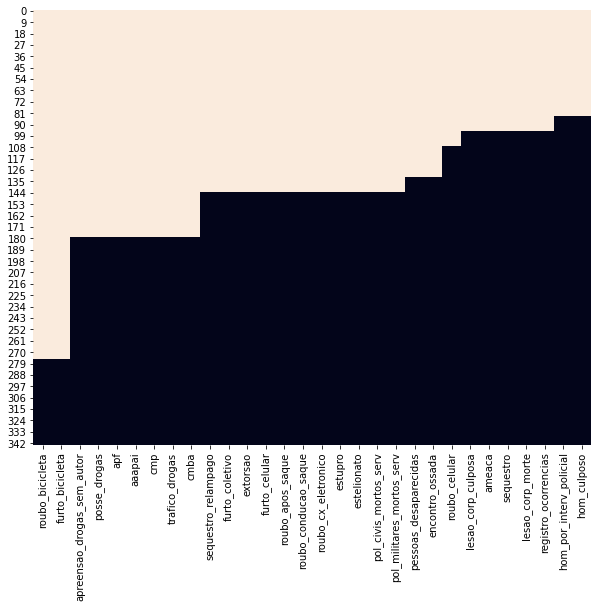

In [ ]:
lista_nulo = nulo.loc[nulo != 0].index.to_list()

#Plotar um heatmap que separe os dados ausentes dos demais (por linhas)

fig = plt.figure(figsize=(10,8))
sns.heatmap(df[lista_nulo].isnull(), cbar = False);

## Organização dos dados em grupos anuais e mensais

Nesta parte do notebook, faremos apenas uma reorganização dos dados, dividindo-os em dois datasets distintos, um organizado com um somatório dos registros para cada ano, e outro com os registros divididos entre os meses do ano.

In [2]:
#Registro de ocorrências dividido por meses
df2 = df.copy()
df2.set_index(['vano','mes'], inplace = True)
df2

hom_doloso  lesao_corp_morte  ...  registro_ocorrencias  fase
vano mes                                ...                            
1991 1           657               NaN  ...                   NaN     3
     2           732               NaN  ...                   NaN     3
     3           713               NaN  ...                   NaN     3
     4           634               NaN  ...                   NaN     3
     5           650               NaN  ...                   NaN     3
...              ...               ...  ...                   ...   ...
2019 4           360               1.0  ...               67797.0     3
     5           345               2.0  ...               68336.0     3
     6           332               3.0  ...               61202.0     3
     7           309               5.0  ...               65817.0     2
     8           318               1.0  ...               65285.0     2

[344 rows x 54 columns]

In [3]:
#Somatório anual dos registros
df3 = df.set_index('vano').sum(level=0)
df3 = df3.drop(columns ='mes')
df3

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,7518,0.0,205,0.0,2250,39053,0.0,0.0,0.0,5806,2441,16452,1021,11090,4249,347,0.0,0.0,0.0,0.0,0.0,1378,42784,23979,10944,0.0,0.0,0.0,42288,77211,0.0,0.0,0.0,0.0,1866,0.0,0.0,0.0,9890,0.0,0.0,0.0,0.0,0.0,0.0,1459,0.0,0.0,0.0,7723,15339,16452,0.0,36
1992,7635,0.0,288,0.0,1910,38489,0.0,0.0,0.0,5466,3080,24502,1936,10814,4810,227,0.0,0.0,0.0,0.0,0.0,1337,52172,27619,10402,0.0,0.0,0.0,44625,82646,0.0,0.0,0.0,0.0,2043,0.0,0.0,0.0,11246,0.0,0.0,0.0,0.0,0.0,0.0,849,0.0,0.0,0.0,7923,15624,24502,0.0,36
1993,7720,0.0,265,0.0,1741,37633,0.0,0.0,0.0,3639,2605,24790,1701,9780,4722,225,0.0,0.0,0.0,0.0,0.0,1487,48949,26897,7488,0.0,0.0,0.0,42283,76668,0.0,0.0,0.0,0.0,1749,0.0,0.0,0.0,11619,0.0,0.0,0.0,0.0,0.0,0.0,792,0.0,0.0,0.0,7985,14502,24790,0.0,36
1994,8408,0.0,223,0.0,1766,35697,0.0,0.0,0.0,4403,2273,27470,1386,11653,4759,310,0.0,0.0,0.0,0.0,0.0,1704,53958,26231,6917,0.0,0.0,0.0,36343,69491,0.0,0.0,0.0,0.0,1830,0.0,0.0,0.0,16030,0.0,0.0,0.0,0.0,0.0,0.0,913,0.0,0.0,0.0,8631,16412,27470,0.0,36
1995,8438,0.0,200,0.0,1944,38469,0.0,0.0,0.0,3886,1625,23676,1198,11381,5126,440,0.0,0.0,0.0,0.0,0.0,1939,49271,21928,6414,0.0,0.0,0.0,31644,59986,0.0,0.0,0.0,0.0,3508,0.0,0.0,0.0,17622,0.0,0.0,0.0,0.0,0.0,0.0,1133,0.0,0.0,0.0,8638,16507,23676,0.0,36
1996,7259,0.0,166,0.0,2018,41180,0.0,0.0,0.0,3610,1120,18367,3003,12311,5480,288,0.0,0.0,0.0,0.0,0.0,2328,46507,20126,9784,0.0,0.0,0.0,31168,61078,0.0,0.0,0.0,0.0,6731,0.0,0.0,0.0,11151,0.0,0.0,0.0,0.0,0.0,0.0,1077,0.0,0.0,0.0,7425,17791,18367,0.0,36
1997,6923,0.0,117,0.0,2355,44273,0.0,0.0,0.0,3879,1000,19576,3063,13512,6574,156,0.0,0.0,0.0,0.0,0.0,7731,55491,21834,9629,0.0,0.0,0.0,40334,71797,0.0,0.0,0.0,0.0,6388,0.0,0.0,0.0,10630,0.0,0.0,0.0,0.0,0.0,0.0,414,0.0,0.0,0.0,7040,20086,19576,0.0,36
1998,5726,0.0,129,355.0,2418,55794,0.0,4108.0,0.0,3964,896,21519,2505,10558,6737,140,0.0,0.0,0.0,0.0,0.0,16049,62368,21309,5687,0.0,0.0,0.0,49391,76387,0.0,0.0,0.0,0.0,13377,0.0,0.0,0.0,12161,0.0,0.0,0.0,0.0,0.0,0.0,462,0.0,0.0,0.0,6210,17295,21519,0.0,36
1999,5888,105.0,146,289.0,2493,62021,0.0,3973.0,38571.0,5063,1321,29666,1071,12893,7653,129,0.0,0.0,0.0,0.0,0.0,18727,76523,20523,5389,0.0,0.0,0.0,54095,80007,0.0,0.0,0.0,0.0,8904,0.0,0.0,0.0,15811,0.0,0.0,0.0,0.0,38338.0,0.0,1001,0.0,0.0,0.0,6428,20546,29666,396839.0,36


## Resumo Estatístico do Dataset de Segurança Pública do RJ

A partir daqui, faremos algumas análises estatísticas e uma visualização dos dados conforme dispostos nos novos datasets.

Primeiramente imprimiremos um resumo estatístico do DataFrame original (usando a função `describe`); a partir disso podemos verificar medidas como média, percentis e desvio-padrão. Valores de média de variáveis específicas que utilizaremos para fazer análises e visualizações surgirão ao avanço do notebook. Outras medidas também serão feitas conforme avançamos.

Usando a função `df.describe()`, esse é o resultado de alguns índices estatísticos que temos para todas as variáveis do dataset original:

In [ ]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

## Visualização e Análise de Dados - Parte I - Dados do dataset geral

A partir daqui, plotaremos alguns gráficos para visualizar a evolução dos índices de crimes usados pelo ISP para avaliar a segurança pública no estado do Rio de Janeiro. Além disso, também faremos algumas análises das variáveis que utilizaremos aqui. Estes resultados serão discutidos conforme for pertinente.


### Roubo, furto, e recuperação de veículos

Em relação aos casos envolvendo veículos, é possível perceber no gráfico que, enquanto houve um aumento nos casos de roubo nos últimos anos, o número de furtos diminuiu. 

Alguns fatos ajudam a entender essa evolução, tanto pelo aumento de casos, quanto pela diferença entre roubos e furtos: Um relatório do Denatran aponta que o município do Rio de Janeiro responde pela [segunda maior frota do país.](https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Brasil_por_frota_total_de_ve%C3%ADculos). Além disso, grupos de criminosos possuem [uma diversidade de abordagem cada vez maior](https://www.ucamcesec.com.br/wp-content/uploads/2011/06/Prisma_geografia_roubos_veiculos.pdf), atacando em diversas vias da capital e do resto do estado.

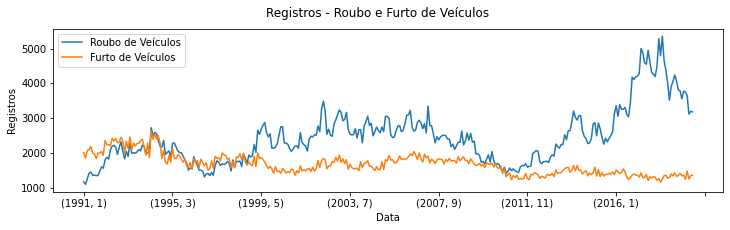

In [6]:
df2.roubo_veiculo.plot(kind='line', legend=True, label='Roubo de Veículos', figsize=(12,3))
df2.furto_veiculos.plot(kind='line', legend=True, label = 'Furto de Veículos', figsize=(12,3))
plt.suptitle('Registros - Roubo e Furto de Veículos')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();

In [ ]:
mean_roubo = df.roubo_veiculo.mean()
mean_furto = df.furto_veiculos.mean()
mean_total = mean_roubo + mean_furto
mean_recup = df.recuperacao_veiculos.mean()

A resposta das autoridades pode ser calculada pela **eficácia na recuperação de veículos**, a partir dos dados do dataset. Podemos ver que, analisando as médias históricas, a eficácia na recuperação de veículos outrora roubados ou furtados ainda não atinge metade dos casos.

In [ ]:
efic_recup = (mean_recup / (mean_total))*100
print("Eficácia na recuperação de veículos: {}%".format(efic_recup))

Eficácia na recuperação de veículos: 42.980346705075085%


### Homicídios

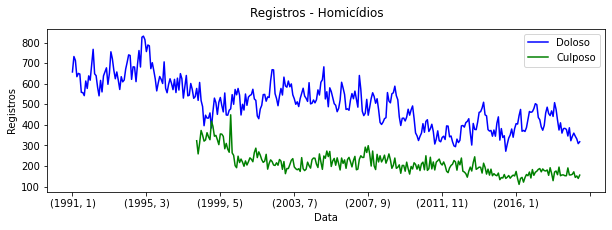

Mín:	272 homicídios dolosos
Máx:	831 homicídios dolosos
Mín:	111.0 homicídios culposos
Máx:	449.0 homicídios culposos


In [ ]:
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()
max_hom_culposo = df.hom_culposo.max()
min_hom_culposo = df.hom_culposo.min()

df2.hom_doloso.plot(kind='line', legend=True, label='Doloso', color='blue', figsize=(10,3))
df2.hom_culposo.plot(kind='line', legend=True, label='Culposo', color='green', figsize=(10,3))
plt.suptitle('Registros - Homicídios')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();

print("Mín:\t{} homicídios dolosos".format(min_hom_doloso))
print("Máx:\t{} homicídios dolosos".format(max_hom_doloso))
print("Mín:\t{} homicídios culposos".format(min_hom_culposo))
print("Máx:\t{} homicídios culposos".format(max_hom_culposo))


### Roubos e furtos

Nessa seção abordaremos os números referentes a roubos e furtos totais. No primeiro gráfico, já é possível ver um considerável acréscimo nos registros tanto de roubos, quanto de furtos no estado do Rio de Janeiro. Destaque para os casos de roubos, que tiveram um aumento expressivo na década de 2010.

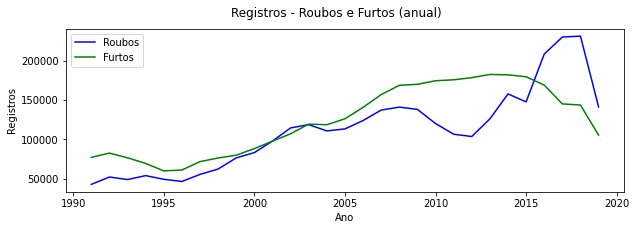

In [ ]:
df3.total_roubos.plot(kind='line', legend=True, label='Roubos', color='blue', figsize=(10,3))
df3.total_furtos.plot(kind='line', legend=True, label='Furtos', color='green', figsize=(10,3))

plt.suptitle('Registros - Roubos e Furtos (anual)')
plt.xlabel('Ano')
plt.ylabel('Registros')
plt.show();

Médias para o primeiro e último ano amostrados:

Ano	Média / Mês
1991	9999.58
2019	30870.88

Variação da média

Houve um aumento de 208.72% na média de roubos e furtos entre 1991 e 2019



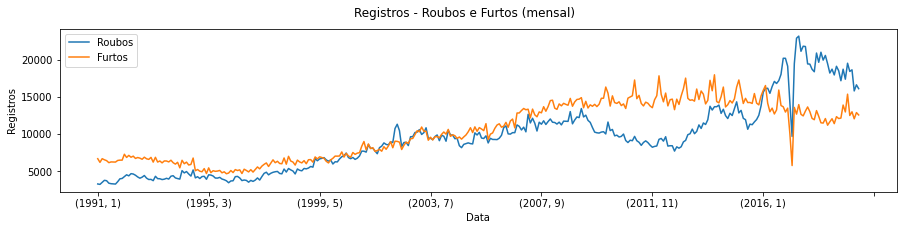

In [ ]:
total = df2.total_roubos+df2.total_furtos

df2.total_roubos.plot(kind='line', legend=True, label='Roubos', figsize=(15,3))
df2.total_furtos.plot(kind='line', legend=True, label='Furtos', figsize=(15,3))
plt.suptitle('Registros - Roubos e Furtos (mensal)')
plt.xlabel('Data')
plt.ylabel('Registros');

#Imprimir na tela a média para 1991 e 2019
print('Médias para o primeiro e último ano amostrados:')
print('\nAno\tMédia / Mês')
print('1991\t{}'.format(round(total.loc[1991].mean(), ndigits=2)))
print('2019\t{}'.format(round(total.loc[2019].mean(), ndigits=2)))


aumento_roubo_furto_porc = (total.loc[2019].mean() - total.loc[1991].mean())*100 / total.loc[1991].mean()
print('\nVariação da média')
print('\nHouve um aumento de {}% na média de roubos e furtos entre 1991 e 2019\n'.format(round(aumento_roubo_furto_porc, ndigits=2)))
#plt.savefig('03totalroubosefurtos.png', dpi=400)
plt.show()

Quando analisamos a média dos registros de roubos e furtos do dataset, percebemos que houve uma triplicação nos registros entre o primeiro ano (1999) e o último ano (2019) completos. Isso é uma das maiores evidências do aumento da criminalidade no estado.

### Crimes financeiros

Ao separarmos alguns dados referentes a crimes financeiros, i.e., ataques a bancos e caixas eletrônicos, percebemos que os crimes perpetrados em bancos diminuíram historicamente. Em relação aos caixas eletrônicos, embora haja picos de registros, historicamente os ataques são menores em relação ao que ocorria com os bancos anos atrás. [Medidas de segurança impostas em lei para caixas eletrônicos](https://www.conjur.com.br/2020-set-16/estado-impor-regras-seguranca-caixas-eletronicos), além de um aumento da vigilância privada em bancos, tornaram os ataques menos frequentes. No entanto, ainda há casos onde criminosos [exploram as brechas de segurança](http://www.mundodigital.net.br/index.php/noticias/software/6158-conheca-falhas-de-seguranca-em-caixas-eletronicos) para lesar clientes e agências bancárias.

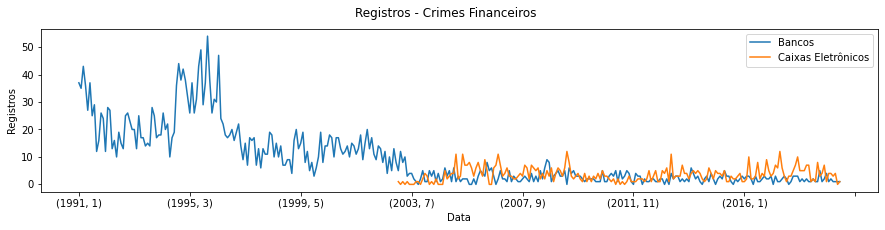

In [ ]:
df2.roubo_banco.plot(kind='line', legend=True, label='Bancos', figsize=(10,3))
df2.roubo_cx_eletronico.plot(kind='line', legend=True, label='Caixas Eletrônicos', figsize=(15,3))
plt.suptitle('Registros - Crimes Financeiros')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();


### Estupro

Os números referentes a casos de estupro nesse dataset estão entre os mais preocupantes do estado do Rio, muito em função da rápida evolução e [gravidade dos relatos que são conhecidos](https://www.uol.com.br/universa/noticias/redacao/2021/04/08/uma-muher-e-morta-a-cada-4-dias-e-estuprada-a-cada-6-horas-no-rio.htm). Com os dados em mãos, percebemos um movimento de aumento nos casos à medida em que o tempo passa. A média móvel vem mostrar que, mesmo que existam picos, [os casos de estupro ainda possuem uma inclinação à aumentar no Rio](https://www.correiobraziliense.com.br/brasil/2021/06/4933242-casos-de-estupro-aumentam-27--no-rio-mostram-dados-do-isp.html).

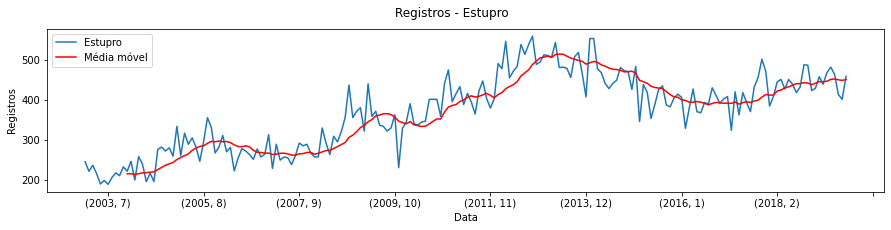

In [ ]:
df2.estupro.plot(legend=True, label='Estupro', figsize = (15,3))
df2.estupro.rolling(12).mean().plot(legend=True, label='Média móvel', color='red')
plt.suptitle('Registros - Estupro')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();

### Roubos no transporte coletivo

A vida de quem usa transporte coletivo diariamente no Rio de Janeiro, além de difícil pela [superlotação, que está cada vez mais comum](https://diariodorio.com/meios-de-transporte-do-rj-justificam-lotacao-nas-viagens-durante-a-pandemia/#:~:text=Soma%2Dse%20a%20esse%20cen%C3%A1rio,servi%C3%A7o%20de%20qualidade%20aos%20passageiros.), está também perigosa: observando os dados de registros de roubos nesse tipo de transporte, percebe-se um assustador movimento de alta nos últimos anos. Isso vem somar às conclusões de que o transporte público no Rio de Janeiro [está em franca crise](https://www.revistaonibus.com.br/noticias/transporte-publico-do-rio-ingredientes-de-um-colapso-anunciado/), e pode ser considerado [um dos piores do mundo](https://www.brasildefatorj.com.br/2019/05/30/rio-de-janeiro-tem-pior-transporte-publico-do-mundo-segundo-pesquisa-internacional).

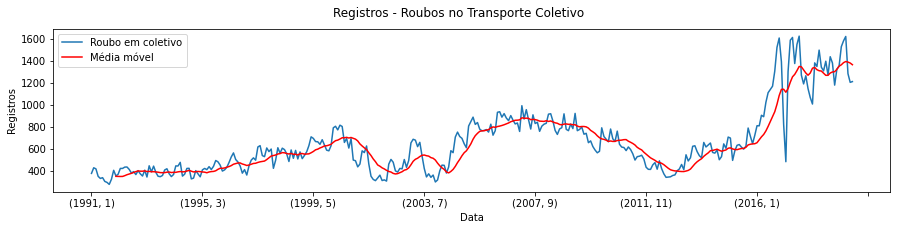

In [ ]:
df2.roubo_em_coletivo.plot(kind = 'line', legend=True, label='Roubo em coletivo', figsize = (15,3))
df2.roubo_em_coletivo.rolling(12).mean().plot(legend=True, label='Média móvel', color='red')
plt.suptitle('Registros - Roubos no Transporte Coletivo')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();

### Indicadores estratégicos: letalidade e roubos

Esta seção é apenas para visualizar a evolução dos chamados indicadores estratégicos determinados pelo ISP. Para a tomada de decisões, estes números são importantes para entender o que está se passando no estado de uma maneira geral. Analisando os registros, é possível evidenciar aquilo que já estava sendo discutido antes: um aumento nos roubos, tanto na rua, quanto de veículos, e uma diminuição da letalidade dos casos apurados pelas autoridades de segurança.

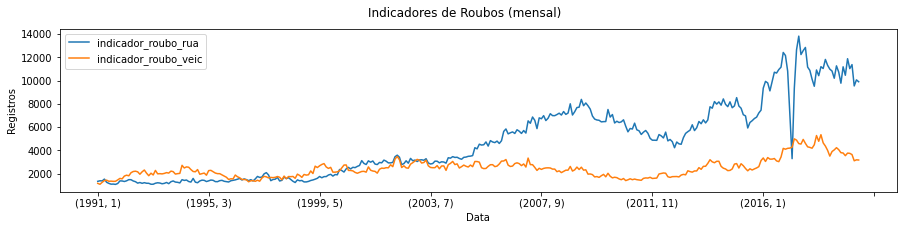

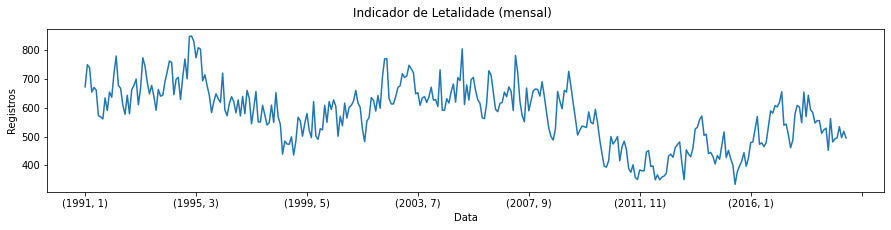

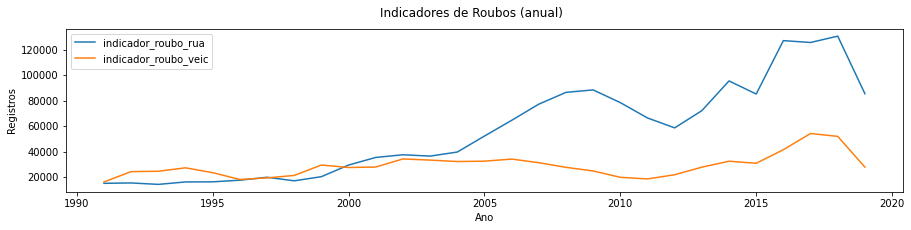

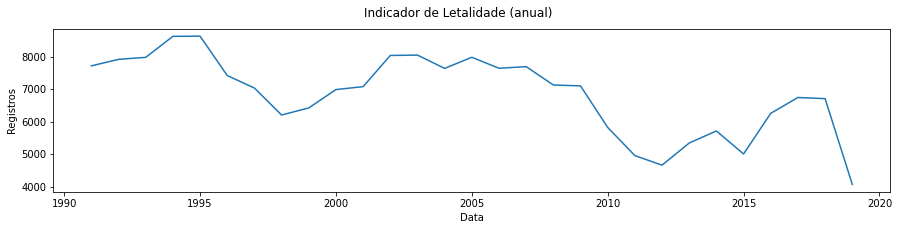

In [ ]:
df2[['indicador_roubo_rua', 'indicador_roubo_veic']].plot(kind='line', figsize=(15,3));
plt.suptitle('Indicadores de Roubos (mensal)')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();

df2.indicador_letalidade.plot(kind='line', figsize=(15,3));
plt.suptitle('Indicador de Letalidade (mensal)')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();

df3[['indicador_roubo_rua', 'indicador_roubo_veic']].plot(kind='line', figsize=(15,3));
plt.suptitle('Indicadores de Roubos (anual)')
plt.xlabel('Ano')
plt.ylabel('Registros')
plt.show();

df3.indicador_letalidade.plot(kind='line', figsize=(15,3));
plt.suptitle('Indicador de Letalidade (anual)')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();



## Parte II: Dados sobre feminicídio

Além dos casos que foram retratados no dataset de Estatísticas de Segurança do ISP, neste notebook ainda analisaremos os dados referentes a outros datasets disponíveis no ISP Dados. Um deles retrata as ocorrências envolvendo o crime de feminicídio.

O feminicídio foi tipificado como modalidade de homicídio qualificado no Brasil em 2015, com a [Lei do Feminicídio](https://pt.wikipedia.org/wiki/Lei_do_Feminic%C3%ADdio). Tal crime também é considerado pela lei como hediondo, provocando uma alteração na [Lei de Crimes Hediondos de 1990](https://pt.wikipedia.org/wiki/Lei_dos_Crimes_Hediondos). Maiores detalhes sobre a legislação podem ser vistas nas referênicias atribuídas acima.

O que é importante ressaltar aqui é que esse crime começou a ser registrado pelo ISP com essa tipificação a partir do ano de 2006, pelos motivos acima. Anterior a isso, homicídios com motivação de sexo eram enquadrados nas variáveis de homicídios do dataset anterior, fazendo com que os dois datasets não possam ser comparados. 

Para analisar os dados do dataset de feminicídio, passaremos pelos mesmos procedimentos que na fase anterior, com a obtenção, processamento, e análise dos dados.

## Obtenção dos dados

In [ ]:
df_fem = pd.read_csv("http://www.ispdados.rj.gov.br/Arquivos/BaseFeminicidioEvolucaoMensalCisp.csv", sep=";")
df_fem.head()

,cisp,ano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


## Somatório anual dos dados

In [ ]:
df_fem2 = df_fem.set_index('ano').sum(level = 0)
df_fem2

,cisp,mes,feminicidio,feminicidio_tentativa,FASE
ano,,,,,
2016,33738,4554,16,53,1242
2017,134952,10764,68,248,4968
2018,134952,10764,71,288,4968
2019,134412,10686,85,334,4932
2020,134412,10686,78,270,4932
2021,44804,1370,30,86,1096


## Análise dos dados

O gráfico resultante dos números obtidos pelo dataset sobre feminicídio indica que, apesar dos números terem diminuído em 2020, as tentativas de feminicídio vieram em uma crescente nos últimos anos, ocorrendo a mesma coisa para os feminicídios efetuados. Esses dados refletem a situação preocupante pela qual passam as mulheres no Rio de Janeiro, onde, estatisticamente, [há muitos casos de ataques por motivação de sexo em uma base diária e semanal](https://www.uol.com.br/universa/noticias/redacao/2021/04/08/uma-muher-e-morta-a-cada-4-dias-e-estuprada-a-cada-6-horas-no-rio.htm).

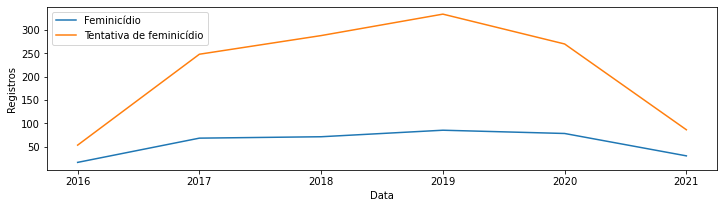

In [ ]:
df_fem2.feminicidio.plot(kind = 'line', legend=True, label='Feminicídio', figsize = (12,3))
df_fem2.feminicidio_tentativa.plot(kind='line', legend=True, label='Tentativa de feminicídio', figsize=(12,3))
plt.suptitle('Registros - Crimes contra a mulher')
plt.xlabel('Ano')
plt.ylabel('Registros')
plt.show();

In [ ]:
df_fem3

## Parte III: Dados sobre apreensão de armas

Outro dataset que está em separado na plataforma ISP Dados e que será analisada aqui refere-se aos registros de apreensão de armas de fogo, que disponibiliza os registros de ocorrências desde o ano de 2007. Este dataset divide as ocorrências com o tipo de armamento apreendido; no entanto, a análise será concentrada aqui no número total de armas. A legislação de posse e porte de armas de fogo e munição é uma coleção de leis, portarias, e decretos, podendo ser consultada [nesse link](http://www.mariz.eti.br/lei_arma.htm). 

In [ ]:
df_armas = pd.read_excel("http://www.ispdados.rj.gov.br/Arquivos/ArmasApreendidasEvolucaoCisp.xlsx")
df_armas.head()

,cisp,mes,ano,aisp,risp,arma_fabricacao_caseira,carabina,espingarda,fuzil,garrucha,garruchao,metralhadora,outros,pistola,revolver,submetralhadora,total
0,1,1,2007,5,1,0,0,0,0,0,0,0,0,0,2,0,2
1,1,2,2007,5,1,0,0,0,0,0,0,0,0,0,1,0,1
2,1,3,2007,5,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,2007,5,1,0,0,0,0,0,0,0,1,4,1,0,6
4,1,5,2007,5,1,0,0,0,0,6,0,0,0,1,2,0,9


In [ ]:
#setar index para mês e ano
df_armas_a = df_armas.copy()
df_armas_a = df_armas_a.set_index('ano').sum(level=0)

df_armas_a

,cisp,mes,aisp,risp,arma_fabricacao_caseira,carabina,espingarda,fuzil,garrucha,garruchao,metralhadora,outros,pistola,revolver,submetralhadora,total
ano,,,,,,,,,,,,,,,,
2007,134952,10764,34224,6372,541,157,1360,214,365,17,59,268,2275,5792,14,11062
2008,134952,10764,34224,6372,269,122,1084,183,290,7,60,212,2197,5082,27,9533
2009,134952,10764,34224,6372,170,118,1083,210,210,6,71,168,2373,4461,44,8914
2010,134952,10764,34224,6372,114,108,923,257,164,11,95,94,2311,3489,35,7601
2011,134952,10764,34224,6372,88,79,775,260,181,17,93,102,2268,3521,51,7435
2012,134952,10764,34224,6372,97,79,721,246,147,8,70,66,2438,3446,49,7367
2013,134952,10764,34224,6372,103,92,678,256,154,8,58,70,2840,3801,41,8101
2014,134952,10764,34224,6372,91,85,777,279,158,16,47,76,3075,3988,57,8649
2015,134952,10764,34224,6372,128,101,817,344,129,16,36,87,3562,3692,44,8956


## Análise dos dados

Os números do dataset de armas retratam que os números de apreensões seguem um ritmo de estabilização, não sendo maiores que no início da contabilização por parte do ISP, mas ainda assim bastante altos. Com esses números, é possível observar que, na última década, [a Polícia do Estado do Rio de Janeiro apreendeu, em média, uma arma por hora no estado](https://www.correiobraziliense.com.br/brasil/2020/12/4896217-policia-do-rio-de-janeiro-apreende-media-de-uma-arma-por-hora-na-ultima-decada.html). Isso vem esclarecer os números altos vistos nas tabelas e gráficos analisados.

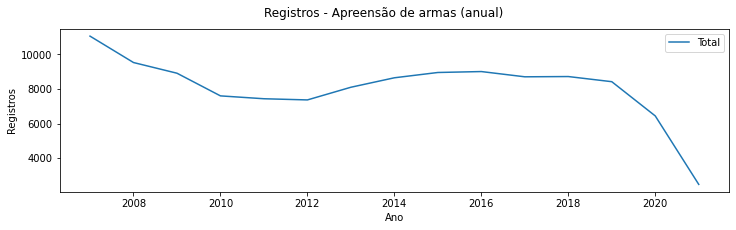

In [ ]:
df_armas_a.total.plot(kind = 'line', legend=True, label='Total', figsize = (12,3))
df_armas_a.rolling(12).mean().plot(legend=True, label='Média móvel', color='red')
plt.suptitle('Registros - Apreensão de armas (anual)')
plt.xlabel('Ano')
plt.ylabel('Registros')
plt.show();

Se observarmos a apreensão de armas em uma base mensal, vemos que a média móvel, embora ainda tenha picos consideráveis de apreensão entre os meses amostrados, é relativamente estável. Isso evidencia a grande quantidade de armas que é capturada pela autoridades de segurança a cada mês no Rio.

In [ ]:
df_armas_m = df_armas.copy()
df_armas_m.set_index(['ano', 'mes'], inplace=True)

df_armas_m

cisp  aisp  risp  ...  revolver  submetralhadora  total
ano  mes                    ...                                  
2007 1       1     5     1  ...         2                0      2
     2       1     5     1  ...         1                0      1
     3       1     5     1  ...         0                0      0
     4       1     5     1  ...         1                0      6
     5       1     5     1  ...         2                0      9
...        ...   ...   ...  ...       ...              ...    ...
2021 8     168    28     5  ...         0                0      0
     9     168    28     5  ...         0                0      0
     10    168    28     5  ...         0                0      0
     11    168    28     5  ...         0                0      0
     12    168    28     5  ...         0                0      0

[24804 rows x 15 columns]

In [ ]:
df_armas_m.plot(kind = 'line', legend=True, label='Registros de apreensão', figsize = (15,3))
df_armas_m.rolling(12).mean().plot(legend=True, label='Média móvel', color='red')
plt.suptitle('Registros - Apreensão de Armas')
plt.xlabel('Data')
plt.ylabel('Registros')
plt.show();

## Considerações finais

As análises dos dados feitas nesse notebook indicam uma evolução preocupante da criminalidade do Rio de Janeiro: apesar da diminuição de ocorrências de alguns crimes, como os roubos a bancos, outros estão aumentando, como os roubos em coletivos e estupros. Espera-se que esse notebook traga uma elucidação maior sobre os efeitos das ações de segurança pública no estado, bem como uma corroboração à posição lamentável que se encontra a cidade do Rio de Janeiro no Índice de Criminalidade.

Se o Rio é uma das portas de entrada do Brasil, que impressões as instituições e as pessoas estão dando ao resto do país e o restante do mundo? Como esses dados poderiam ser explorados para tomadas de decisão por parte das autoridades de segurança pública? **Há a necessidade urgente de uma mudança. Mas por onde teríamos de começar?**